In [22]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from trained_results_funcs import find_best_layer
import pandas as pd

In [23]:
subjects_arr_fed  = np.load('/data/LLMs/data_processed/fedorenko/dataset/subjects.npy')

In [41]:
def find_best_layer(layer_range, noL2_str, exp, resultsPath, subjects, dataset, perf='pearson_r', 
                    selected_network_indices = None, feature_extraction = '', model_name='gpt2-xl', seed_number=None):
    

    layer_perf_dict = {}
    layer_perf_dict_mean = {}
    
    if dataset == 'pereira':
        subjects = subjects[selected_network_indices]
        
    if seed_number is not None:
        seed_str = f"_m{seed_number}"
    else:
        seed_str = ''
    
    for l in layer_range:
        layer_perf = np.load(f'{resultsPath}/{dataset}_{model_name}{feature_extraction}{seed_str}_layer_{l}_1{noL2_str}{exp}.npz')[perf]
        
        if perf != 'pearson_r':
            layer_perf = np.clip(layer_perf, 0, np.inf)
        
        layer_perf = np.nan_to_num(layer_perf, nan=0)
        
        if dataset == 'pereira':
            layer_perf = layer_perf[selected_network_indices]
            
        layer_subject = pd.DataFrame({'perf': layer_perf, 'subject': subjects})    

        perf_avg = np.median(layer_subject.groupby(['subject']).median())
        perf_avg_mean = np.mean(layer_subject.groupby(['subject']).mean())
        
        layer_perf_dict[l] = perf_avg
        layer_perf_dict_mean[l] = perf_avg_mean
        
        
    best_layer = max(layer_perf_dict, key=layer_perf_dict.get)
    
    layer_perf_best =  np.load(f'{resultsPath}/{dataset}_{model_name}{feature_extraction}{seed_str}_layer_{best_layer}_1{noL2_str}{exp}.npz')[perf]
    layer_perf_best = np.nan_to_num(layer_perf_best, 0)
        
    return [layer_perf_dict, layer_perf_dict_mean], best_layer, layer_perf_best   

In [56]:
layer_perf_dict, best_layer, layer_perf_best  = find_best_layer(np.arange(49), noL2_str='_noL2', exp='', resultsPath='/data/LLMs/brainscore/results_fedorenko/', subjects=subjects_arr_fed, perf='pearson_r', 
                selected_network_indices=np.arange(len(subjects_arr_fed)), dataset='fedorenko')

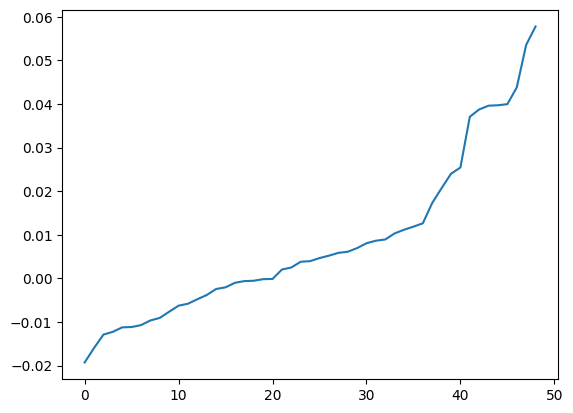

In [57]:
plt.plot(np.sort(list(layer_perf_dict[0].values())))

In [53]:
np.sort(list(layer_perf_dict[0].values()))

array([-0.02733931, -0.01695709, -0.01207012, -0.00773415, -0.00665965,
       -0.00624749, -0.00617777, -0.0055387 , -0.0053588 , -0.00513764,
       -0.00465521, -0.00430916, -0.00283597, -0.0020902 ,  0.00023165,
        0.00142989,  0.00179792,  0.00193368,  0.00219477,  0.00225538,
        0.00299992,  0.00393242,  0.00471108,  0.00485415,  0.00628283,
        0.00677343,  0.00786164,  0.00794514,  0.00810374,  0.00838539,
        0.00904709,  0.00947568,  0.0097742 ,  0.01097384,  0.01331788,
        0.01407384,  0.0267463 ,  0.04180192,  0.04207576,  0.04392075,
        0.04653665,  0.04759496,  0.0790472 ,  0.10056983,  0.10668869,
        0.11129855,  0.11176604,  0.11242884,  0.14304716])

In [58]:
layer_perf_dict, best_layer, layer_perf_best  = find_best_layer(np.arange(49), noL2_str='_noL2_noL2custom', exp='', resultsPath='/data/LLMs/brainscore/results_fedorenko', subjects=subjects_arr_fed, perf='pearson_r', 
                selected_network_indices=np.arange(len(subjects_arr_fed)), dataset='fedorenko')

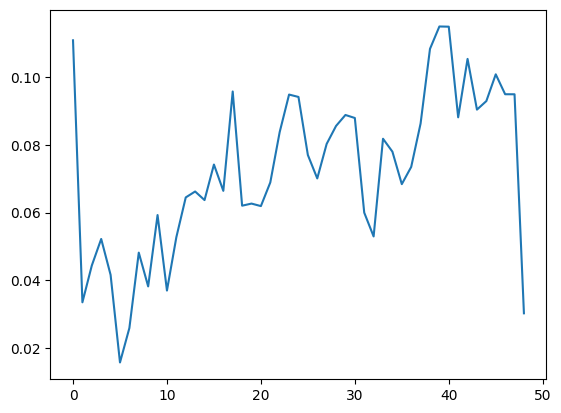

In [59]:
plt.plot(layer_perf_dict[0].keys(), layer_perf_dict[0].values())

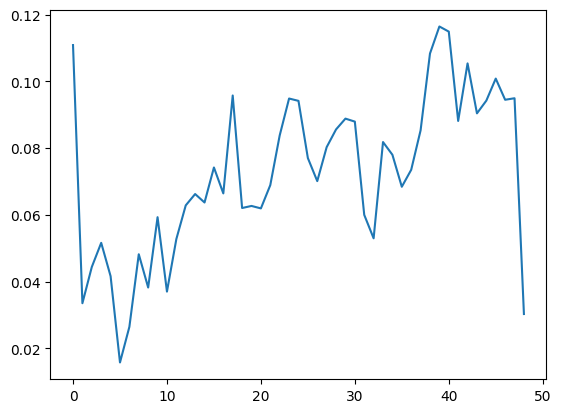

In [55]:
plt.plot(layer_perf_dict[0].keys(), layer_perf_dict[0].values())

In [ ]:
plt.plot(layer_perf_dict[0].keys(), layer_perf_dict[0].values())

<Axes: >

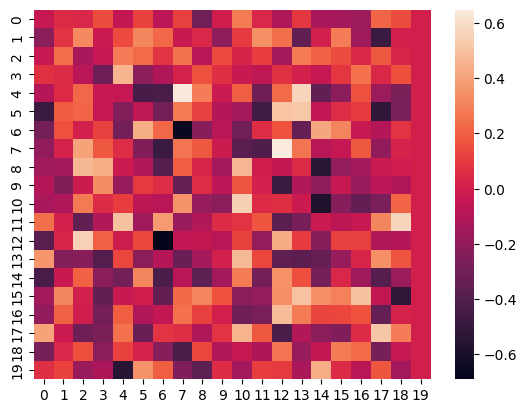

In [171]:
model = LinearRegression()
model.fit(X,y)
sns.heatmap(model.coef_)

In [175]:
X_train = np.load('X_train_OASM.npy')[:, :243]
X_test = np.load('X_test_OASM.npy')[:, :243]
y_train = np.load('y_train_OASM.npy')
y_test = np.load('y_test_OASM.npy')

<Axes: >

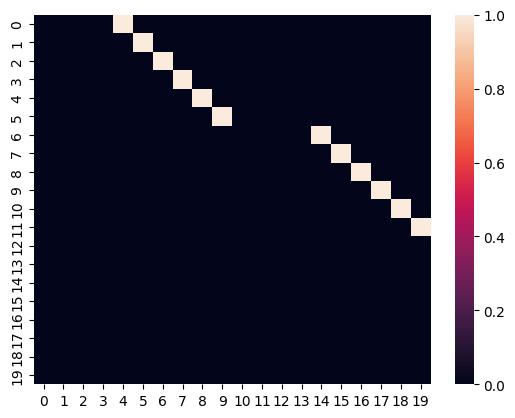

In [192]:
sns.heatmap(X_train)
# Each row is a sample, each column is a feature

In [114]:
zero_features_train = np.argwhere(np.sum(X_train, axis=0)==0).squeeze()
zero_features_test = np.argwhere(np.sum(X_test, axis=0)==0).squeeze() 
np.intersect1d(zero_features_test, zero_features_train)

array([], dtype=int64)

In [159]:
# Linear regression function with optional bias term
def linear_regression_from_scratch(X_train, y_train, add_bias=True):
    # Optionally add a bias (intercept) term by appending a column of ones to X_train
    if add_bias:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    
    # Use pseudo-inverse to handle cases where (X^T * X) might be singular
    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    return w

# Function to make predictions using the trained weights
def predict(X, w, add_bias=True):
    # Optionally add a bias (intercept) term by appending a column of ones to X
    if add_bias:
        X = np.c_[np.ones(X.shape[0]), X]
    return X @ w


In [218]:
w = linear_regression_from_scratch(X_train, y_train, add_bias=True)

In [219]:
y_pred = predict(X_test, w, add_bias=True)

In [234]:
y_pred[:, 2]

array([0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062, 0.58253062, 0.58253062, 0.58253062,
       0.58253062, 0.58253062])

In [248]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)
ypred2 = linreg.predict(X_test)

In [250]:
X_test.shape

(47, 243)

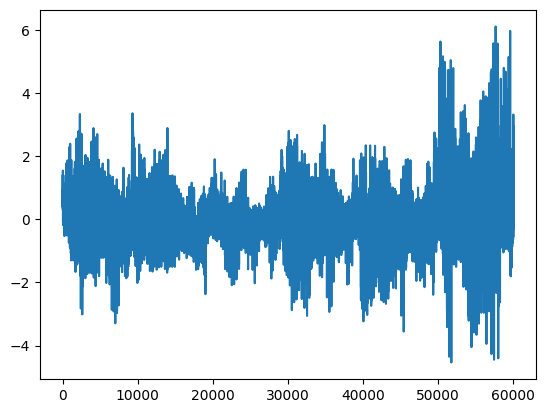

In [228]:
plt.plot(y_pred[0])

<Axes: >

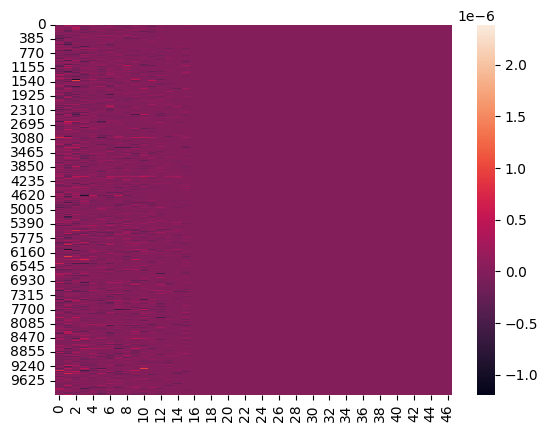

In [206]:
sns.heatmap(linreg.coef_[:10000, zero_features_train])

In [113]:
np.mean(linreg.coef_[:, zero_features_train])

0.00366872

In [79]:
OASM = np.load('/data/LLMs/data_processed/pereira/acts/X_OASM-all-sigma.npz')['0.1'][:243, :243]

In [80]:
OASM.shape

(243, 243)

In [63]:
standardscaler = StandardScaler()

In [65]:
OASM_train = standardscaler.fit_transform(OASM[:196])
OASM_test = standardscaler.transform(OASM[196:])

In [76]:
OASM_train[:, 0].mean()

-2.2657612747452175e-17

In [32]:
perf = np.nan_to_num(np.load('/data/LLMs/brainscore/results_pereira/pereira_OASM-all-sigma_0.1_1_noL2_243.npz')['pearson_r'])
print(np.argmin(perf))


52940


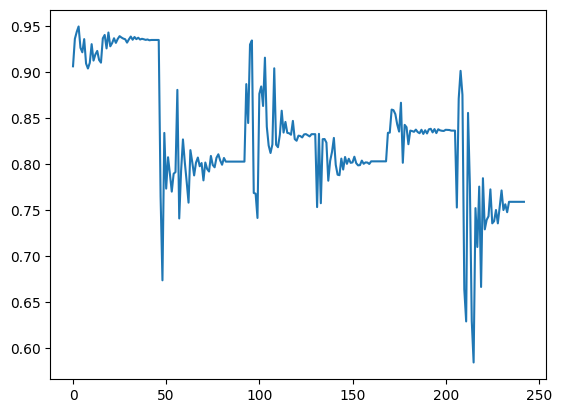

In [35]:
plt.plot(np.load('/data/LLMs/brainscore/results_pereira/pereira_OASM-all-sigma_0.1_1_noL2_243.npz')['y_hat'][:, 50])

<Axes: >

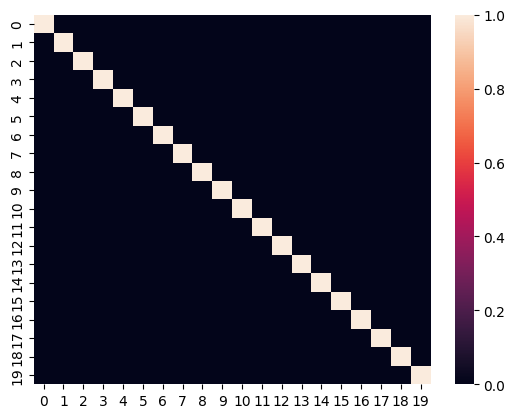

In [45]:
OASM = np.load('/data/LLMs/data_processed/pereira/acts/X_OASM-all-sigma.npz')
sns.heatmap(OASM['0.1'][0:20, 0:20])